In [ ]:
#Product Demand Prediction using RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor and xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error,root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/demand.csv')
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [ ]:
df.isnull().sum()

,0
ID,0
Store ID,0
Total Price,1
Base Price,0
Units Sold,0


In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,206.626751,219.424262,51.674543
std,61385.825580,615.593192,103.308516,110.960204,60.207962
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.000000,8562.000000,130.387500,133.237500,20.000000
50%,106226.000000,9371.000000,198.075000,205.912500,35.000000
75%,159452.000000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [ ]:
x=df[["Total Price","Base Price"]]
y=df["Units Sold"]

In [ ]:
print(x.shape)
print(y.shape)

(150149, 2)
(150149,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120119, 2)
(30030, 2)
(120119,)
(30030,)


In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.5792805864241181

In [ ]:
rf.score(x_test,y_test)

0.43332149765840244

In [ ]:
y_pred=rf.predict(x_test)
print(y_pred)

[ 36.71525932  26.75588282 202.11545452 ...  24.7875      32.34998633
  45.11477354]


In [ ]:
original_values=scaler.inverse_transform(x_test)
print(original_values)

[[212.325  212.325 ]
 [205.9125 205.9125]
 [140.3625 227.2875]
 ...
 [269.325  327.75  ]
 [355.5375 469.5375]
 [117.5625 117.5625]]


In [ ]:
print(mean_absolute_error(y_test,y_pred))

25.001602356911107


In [ ]:
print(mean_squared_error(y_test,y_pred))

1854.4270990280252


In [ ]:
print(r2_score(y_test,y_pred))

0.43332149765840244


In [ ]:
print(mean_absolute_percentage_error(y_test,y_pred))

0.9187773860964725


In [ ]:
print(mean_squared_log_error(y_test,y_pred))

0.4745177691626323


In [ ]:
print(root_mean_squared_error(y_test,y_pred))

43.063059564178964


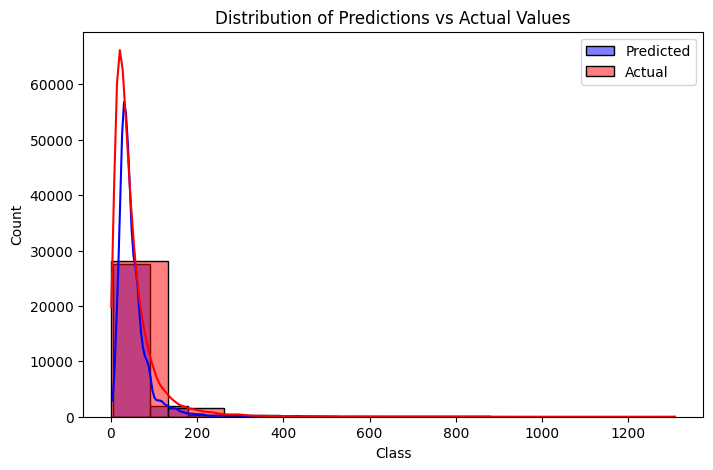

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(x_train,y_train)

0.5938989469566557

In [ ]:
dt.score(x_test,y_test)

0.3783332781297337

In [ ]:
y_pred_dt=dt.predict(x_test)
print(y_pred_dt)

[ 36.71321408  26.76732852 199.17021277 ...  18.          32.33515483
  45.2364532 ]


In [ ]:
original_values_dt=scaler.inverse_transform(x_test)
print(original_values_dt)

[[212.325  212.325 ]
 [205.9125 205.9125]
 [140.3625 227.2875]
 ...
 [269.325  327.75  ]
 [355.5375 469.5375]
 [117.5625 117.5625]]


In [ ]:
print(mean_absolute_error(y_test,y_pred_dt))

25.494932844752316


In [ ]:
print(mean_squared_error(y_test,y_pred_dt))

2034.3733013277488


In [ ]:
print(r2_score(y_test,y_pred_dt))

0.3783332781297337


In [ ]:
print(mean_absolute_percentage_error(y_test,y_pred_dt))

0.923553747748907


In [ ]:
print(mean_squared_log_error(y_test,y_pred_dt))

0.49093193841908384


In [ ]:
print(root_mean_squared_error(y_test,y_pred_dt))

45.10402755107074


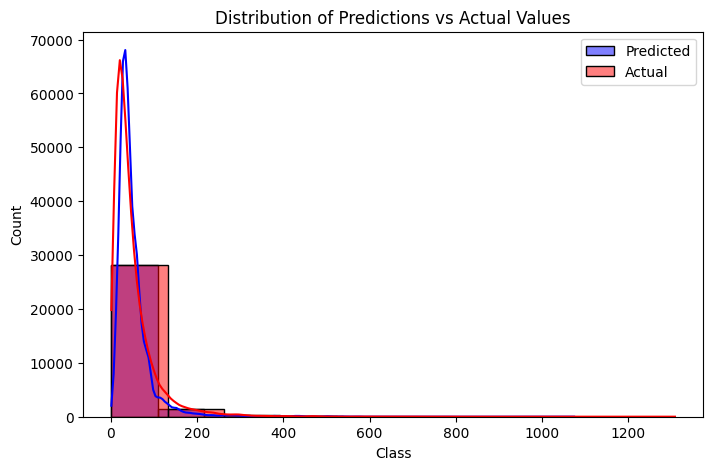

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_dt, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
knn.score(x_train,y_train)

0.44732004200639053

In [ ]:
knn.score(x_test,y_test)

0.3856293507432823

In [ ]:
y_pred_knn=knn.predict(x_test)
print(y_pred_knn)

[ 38.6  28.  173.6 ...  45.   27.8  42.2]


In [ ]:
original_values_knn=scaler.inverse_transform(x_test)
print(original_values_knn)

[[212.325  212.325 ]
 [205.9125 205.9125]
 [140.3625 227.2875]
 ...
 [269.325  327.75  ]
 [355.5375 469.5375]
 [117.5625 117.5625]]


In [ ]:
print(mean_absolute_error(y_test,y_pred_knn))

26.943802863802862


In [ ]:
print(mean_squared_error(y_test,y_pred_knn))

2010.4972680652681


In [ ]:
print(r2_score(y_test,y_pred_knn))

0.3856293507432823


In [ ]:
print(mean_absolute_percentage_error(y_test,y_pred_knn))

0.9906728242991876


In [ ]:
print(mean_squared_log_error(y_test,y_pred_knn))

0.5376755446921946


In [ ]:
print(root_mean_squared_error(y_test,y_pred_knn))

44.838568978785084


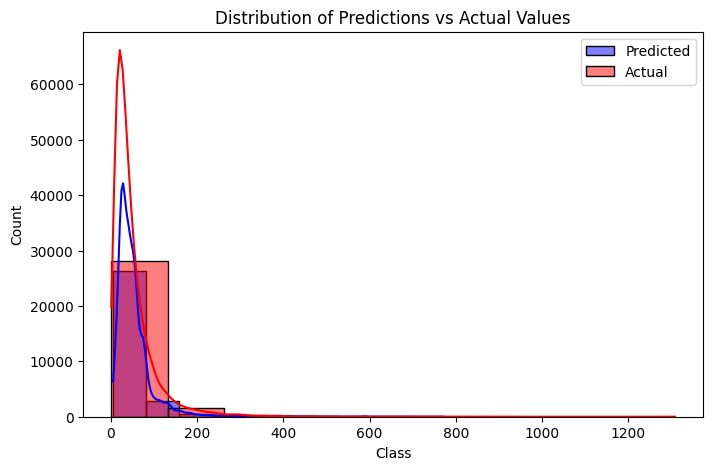

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_knn, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#XGBRegressor

In [ ]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.score(x_train,y_train)

0.49509376287460327

In [ ]:
model.score(x_test,y_test)

0.44244295358657837

In [ ]:
y_pred_xgb=model.predict(x_test)
print(y_pred_xgb)

[ 37.18981   26.893888 200.94078  ...  33.856873  37.634533  45.401566]


In [ ]:
original_values_xgb=scaler.inverse_transform(x_test)
print(original_values_xgb)

[[212.325  212.325 ]
 [205.9125 205.9125]
 [140.3625 227.2875]
 ...
 [269.325  327.75  ]
 [355.5375 469.5375]
 [117.5625 117.5625]]


In [ ]:
print(mean_absolute_error(y_test,y_pred_xgb))

25.16094970703125


In [ ]:
print(mean_squared_error(y_test,y_pred_xgb))

1824.5772705078125


In [ ]:
print(r2_score(y_test,y_pred_xgb))

0.44244295358657837


In [ ]:
print(mean_absolute_percentage_error(y_test,y_pred_xgb))

0.9487035870552063


In [ ]:
print(mean_squared_log_error(y_test,y_pred_xgb))

0.48646673560142517


In [ ]:
print(root_mean_squared_error(y_test,y_pred_xgb))

42.71507263183594


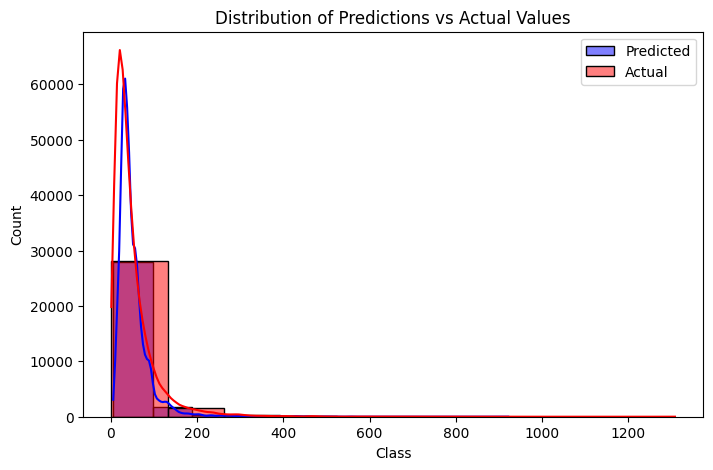

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_xgb, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
